# Craig's code, OOI Endurance profiler

You can find my now working code at https://gist.github.com/crisien/1eac8a284bfbc4fa27dc00053817e617. It's not pretty but it works.

In [1]:
"""
Created on Tue Aug 21 11:36:40 2018
@author: crisien
"""

import requests
import matplotlib.pyplot as plt
import numpy as np

import datetime
from datetime import date
import calendar

In [2]:
# function to make an API request and print the results
def get_and_print_api(url):
  r = requests.get(url, auth=(USERNAME, TOKEN))
  data = r.json()
  for d in data:
    print( d )
    
#get_and_print_api(SENSOR_BASE_URL+'/CE09OSPM')
#get_and_print_api(SENSOR_BASE_URL+'/CE09OSPM/WFP01')
#get_and_print_api(SENSOR_BASE_URL+'/CE09OSPM/WFP01/03-CTDPFK000')
#get_and_print_api(SENSOR_BASE_URL+'/CE09OSPM/WFP01/03-CTDPFK000/recovered_wfp')

def ntp_seconds_to_datetime(ntp_seconds):
   return datetime.datetime.utcfromtimestamp(ntp_seconds - ntp_delta).replace(microsecond=0)

In [3]:
USERNAME = 'OOIAPI-T4K9H80QN79JPD'
TOKEN =  '2QXI1W549EC1EU'

SENSOR_BASE_URL = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/'

r = requests.get(SENSOR_BASE_URL, auth=(USERNAME, TOKEN))
#print( r.status_code )
#print( r.headers )
#print( r.encoding )
#print( r.text )
#print( r.json() )

#sites = r.json()
#for site in sites:
#  print( site )

In [4]:
temp_binned = np.zeros((510, 51))
salt_binned = np.zeros((510, 51))

kk=-1

for i in range(2014, 2019, 1):
    
    if i == 2014:
        mm=10
    else:
        mm=1
    
    for j in range(mm, 13, 1):
        
        if i == 2018 and j >= 3:
            # Instrument Information
            site = 'CE09OSPM'
            node = 'WFP01'
            instrument = '03-CTDPFK000'
            method = 'telemetered'
            stream = 'ctdpf_ckl_wfp_instrument'
        else:
            # Instrument Information
            site = 'CE09OSPM'
            node = 'WFP01'
            instrument = '03-CTDPFK000'
            method = 'recovered_wfp'
            stream = 'ctdpf_ckl_wfp_instrument_recovered'
    
        start_date = date(i,j,1)
        days_in_month = calendar.monthrange(start_date.year, start_date.month)[1]
        
        if j < 10:
            month='0'+str(j)
        else:
            month=str(j)
        
        params = {
          'beginDT':str(i)+'-'+month+'-'+str(days_in_month)+'T00:00:00.000Z',
          'endDT':str(i)+'-'+month+'-'+str(days_in_month)+'T23:59:59.000Z',
          'limit':20000,   
        }
        
        data_request_url ='/'.join((SENSOR_BASE_URL,site,node,instrument,method,stream))
        r = requests.get(data_request_url, params=params, auth=(USERNAME, TOKEN))
        data = r.json()
        
        if len(data) == 2:
           print('no data for '+str(i)+'-'+month)
           kk=kk+1
        else:
           print('found some data for '+str(i)+'-'+month)
           # Time Processing Routine
           ntp_epoch = datetime.datetime(1900, 1, 1)
           unix_epoch = datetime.datetime(1970, 1, 1)
           ntp_delta = (unix_epoch - ntp_epoch).total_seconds()
        
           # Process the data
           time = []
           pressure = []
           temperature = []
           salinity = []
           for xx in range(len(data)):
             time.append(ntp_seconds_to_datetime(data[xx]['time']))
             pressure.append(data[xx]['ctdpf_ckl_seawater_pressure'])
             temperature.append(data[xx]['ctdpf_ckl_seawater_temperature'])
             salinity.append(data[xx]['practical_salinity'])
        
           temperature=np.array(temperature)
           pressure=np.array(pressure)
           salinity=np.array(salinity)
        
           bins = np.arange(511)   #1m bins; at 25cm/s ~ 4obs/1m bin
            
           temp_array = np.zeros((len(bins)-1,))
           temp_array[temp_array == 0.0] = np.nan
           salt_array = np.zeros((len(bins)-1,))
           salt_array[salt_array == 0.0] = np.nan
           
           k=-1
           for ii in range(len(bins)-1):
               ind = np.where((pressure >= bins[ii]) & (pressure < bins[ii+1]))
               k=k+1
               temp_array[k] = np.nanmean(temperature[ind])
               salt_array[k] = np.nanmean(salinity[ind])

           kk=kk+1
           temp_binned[:,kk]=temp_array
           salt_binned[:,kk]=salt_array


temp_binned[temp_binned == 0.0] = np.nan
salt_binned[salt_binned == 0.0] = np.nan
temp_binned=temp_binned[:,0:46] #Oct 2014 - July 2018
salt_binned=salt_binned[:,0:46]

#plt.plot(temp_binned[:,1])
#plt.plot(salt_binned[:,1])

#get array dims
[x,y]=np.shape(temp_binned)
#these are monthly mean data so f=1/12
f=1./12.

found some data for 2014-10


/home/mayorga/miniconda/envs/ioosaccess/lib/python3.6/site-packages/ipykernel/__main__.py:84: RuntimeWarning: Mean of empty slice
/home/mayorga/miniconda/envs/ioosaccess/lib/python3.6/site-packages/ipykernel/__main__.py:85: RuntimeWarning: Mean of empty slice


found some data for 2014-11
found some data for 2014-12
found some data for 2015-01
found some data for 2015-02
found some data for 2015-03
found some data for 2015-04
found some data for 2015-05
found some data for 2015-06
found some data for 2015-07
found some data for 2015-08
found some data for 2015-09
found some data for 2015-10
found some data for 2015-11
found some data for 2015-12
found some data for 2016-01
found some data for 2016-02
found some data for 2016-03
found some data for 2016-04
found some data for 2016-05
found some data for 2016-06
found some data for 2016-07
found some data for 2016-08
no data for 2016-09
no data for 2016-10
no data for 2016-11
no data for 2016-12
no data for 2017-01
no data for 2017-02
no data for 2017-03
found some data for 2017-04
found some data for 2017-05
found some data for 2017-06
found some data for 2017-07
found some data for 2017-08
found some data for 2017-09
found some data for 2017-10
found some data for 2017-11
found some data for 

In [5]:
# now start calculating a temperature climatology for each of the 510 bin depths

temp_beta_values = np.zeros((x,9))

for i in range(0, x):
    c = np.squeeze(temp_binned[i,:])
    t = np.arange(0, y)
    #remove the nans
    t = t[~np.isnan(c)]
    c = c[~np.isnan(c)]
    
    N=len(c)
        
    if N == 0:
        temp_beta_values[i,:] = np.nan
    else:
        X=[np.ones(N),np.sin(2*np.pi*f*t),np.cos(2*np.pi*f*t),np.sin(4*np.pi*f*t),np.cos(4*np.pi*f*t),np.sin(6*np.pi*f*t),np.cos(6*np.pi*f*t),np.sin(8*np.pi*f*t),np.cos(8*np.pi*f*t)]
        [b,residues,rank,s] = np.linalg.lstsq(np.transpose(X),c,rcond=-1)
        temp_beta_values[i,:] = b


In [6]:
#now start calculating a salinity climatology for each of the 510 bin depths

salt_beta_values = np.zeros((x,9))

for i in range(0, x):
    c = np.squeeze(salt_binned[i,:])
    t = np.arange(0, y)
    #remove the nans
    t = t[~np.isnan(c)]
    c = c[~np.isnan(c)]
    
    N=len(c)
        
    if N == 0:
        salt_beta_values[i,:] = np.nan
    else:
        X=[np.ones(N),np.sin(2*np.pi*f*t),np.cos(2*np.pi*f*t),np.sin(4*np.pi*f*t),np.cos(4*np.pi*f*t),np.sin(6*np.pi*f*t),np.cos(6*np.pi*f*t),np.sin(8*np.pi*f*t),np.cos(8*np.pi*f*t)]
        [b,residues,rank,s] = np.linalg.lstsq(np.transpose(X),c,rcond=-1)
        salt_beta_values[i,:] = b

In [7]:
new_t=np.arange(0, y)
temp_seasonal_cycle = np.zeros((x,y))

for i in range(0, x):
        T=(temp_beta_values[i,0]+temp_beta_values[i,1]*np.sin(2.*np.pi*f*new_t)+temp_beta_values[i,2]*np.cos(2.*np.pi*f*new_t)+temp_beta_values[i,3]*np.sin(4.*np.pi*f*new_t)+temp_beta_values[i,4]*np.cos(4.*np.pi*f*new_t))
        temp_seasonal_cycle[i,:] = T

new_t=np.arange(0, y)
salt_seasonal_cycle = np.zeros((x,y))

for i in range(0, x):
        T=(salt_beta_values[i,0]+salt_beta_values[i,1]*np.sin(2.*np.pi*f*new_t)+salt_beta_values[i,2]*np.cos(2.*np.pi*f*new_t)+salt_beta_values[i,3]*np.sin(4.*np.pi*f*new_t)+salt_beta_values[i,4]*np.cos(4.*np.pi*f*new_t))
        salt_seasonal_cycle[i,:] = T

temp_seasonal_cycle[0:30,:]=np.nan #nan out data above 30 meters where tere is to little data to calculate a decent climatology
salt_seasonal_cycle[0:30,:]=np.nan

## Plots

In [8]:
bin_cnt=bins-.5
bin_cnt=bin_cnt[1:]

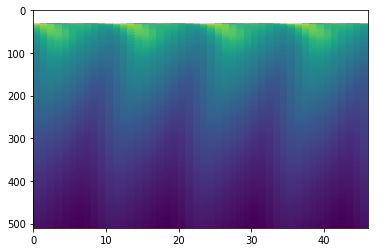

In [9]:
plt.pcolor(temp_seasonal_cycle)
plt.gca().invert_yaxis()

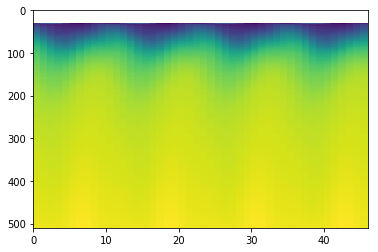

In [10]:
plt.pcolor(salt_seasonal_cycle)
plt.gca().invert_yaxis()

Text(0.5,0,'Salinity')

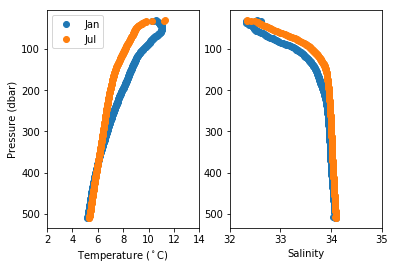

In [18]:
plt.subplot(121)
plt.plot_date(temp_seasonal_cycle[:,3],bin_cnt)
plt.plot_date(temp_seasonal_cycle[:,9],bin_cnt)
plt.legend(['Jan','Jul'])
plt.gca().invert_yaxis()
plt.xlim(4,12)
plt.xticks([2, 4, 6, 8, 10, 12, 14], [2, 4, 6, 8, 10, 12, 14])
plt.ylabel('Pressure (dbar)')
plt.xlabel('Temperature ($^\circ$C)')

plt.subplot(122)
plt.plot_date(salt_seasonal_cycle[:,3],bin_cnt)
plt.plot_date(salt_seasonal_cycle[:,9],bin_cnt)
plt.gca().invert_yaxis()
plt.xlim(32,35)
plt.xticks([32, 33, 34, 35], [32, 33, 34, 35])
plt.xlabel('Salinity')

### Save to numpy files, for reuse
Arrays to save: temp_binned, salt_binned, temp_beta_values, salt_beta_values temp_seasonal_cycle, salt_seasonal_cycle

In [26]:
# temp_binned, salt_binned, temp_beta_values, salt_beta_values temp_seasonal_cycle, salt_seasonal_cycle
out_basefname = 'ce09ospm_'

np.save(out_basefname+'temp_binned', temp_binned)
np.save(out_basefname+'temp_beta_values', temp_beta_values)
np.save(out_basefname+'temp_seasonal_cycle', temp_seasonal_cycle)

np.save(out_basefname+'salt_binned', salt_binned)
np.save(out_basefname+'salt_beta_values', salt_beta_values)
np.save(out_basefname+'salt_seasonal_cycle', salt_seasonal_cycle)